ЗАВАНТАЖЕННЯ ДАТАСЕТУ

Розмір датасету: (40000, 25)

Перші рядки:
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                    

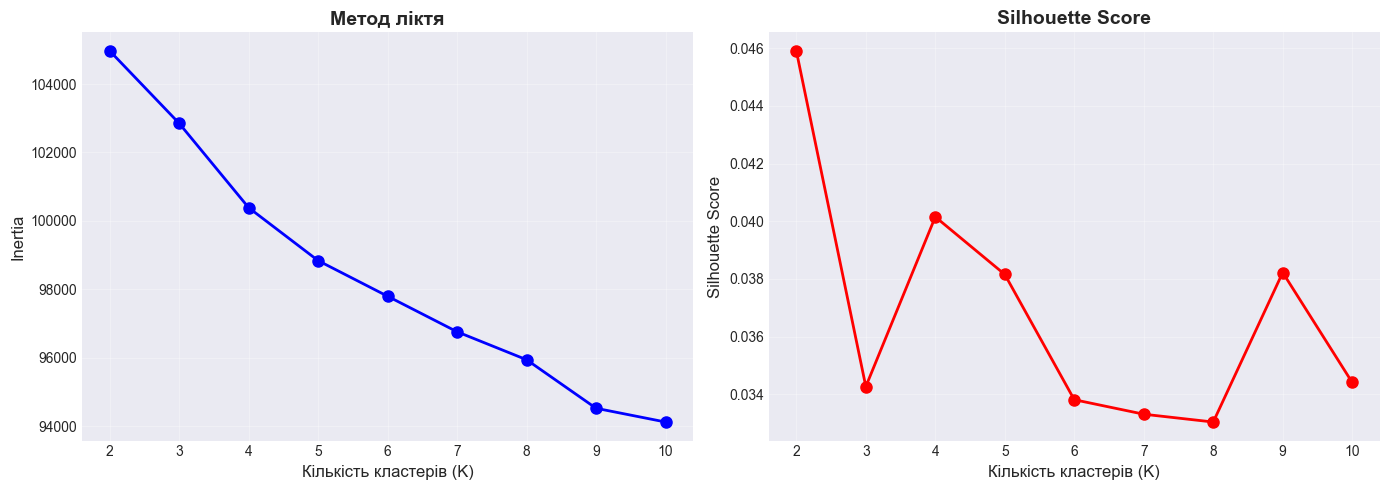


Результати K-means для K=3:
  Silhouette Score: 0.034 (краще ближче до 1)
  Davies-Bouldin Index: 4.433 (краще менше)
  Calinski-Harabasz Score: 173.65 (краще більше)
  Розподіл по кластерам: {np.int32(0): np.int64(1766), np.int32(1): np.int64(1721), np.int32(2): np.int64(1513)}

Результати K-means для K=4:
  Silhouette Score: 0.040 (краще ближче до 1)
  Davies-Bouldin Index: 4.675 (краще менше)
  Calinski-Harabasz Score: 159.50 (краще більше)
  Розподіл по кластерам: {np.int32(0): np.int64(1141), np.int32(1): np.int64(1276), np.int32(2): np.int64(1346), np.int32(3): np.int64(1237)}

Результати K-means для K=5:
  Silhouette Score: 0.038 (краще ближче до 1)
  Davies-Bouldin Index: 4.330 (краще менше)
  Calinski-Harabasz Score: 141.05 (краще більше)
  Розподіл по кластерам: {np.int32(0): np.int64(647), np.int32(1): np.int64(1268), np.int32(2): np.int64(960), np.int32(3): np.int64(1208), np.int32(4): np.int64(917)}


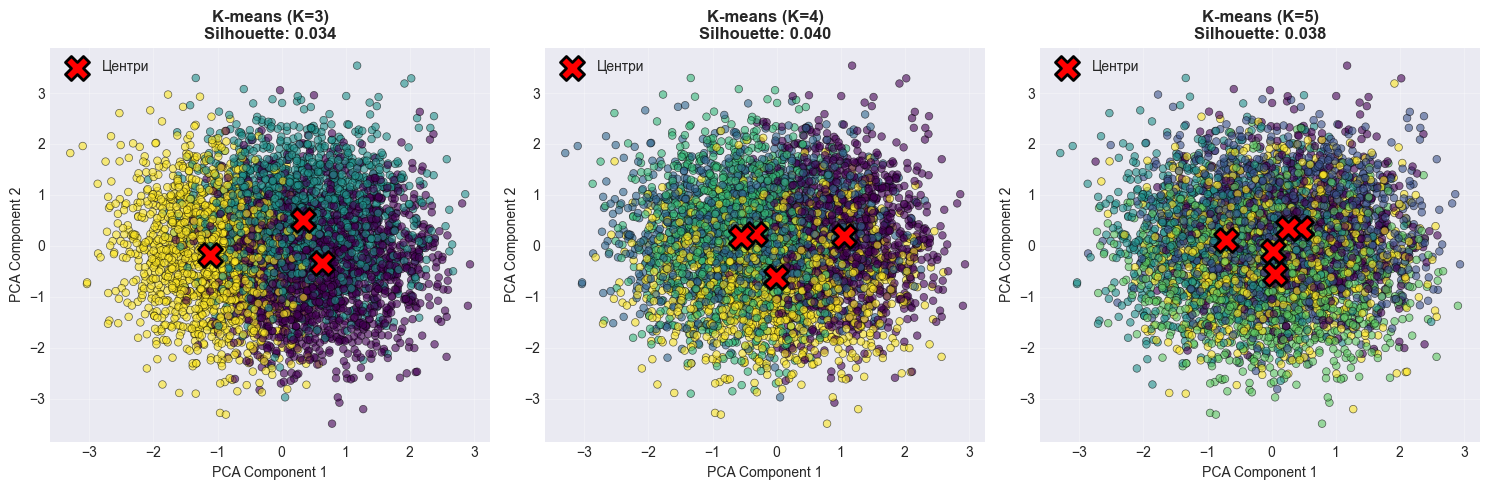


Таблиця метрик K-means:
 K  Silhouette  Davies-Bouldin  Calinski-Harabasz
 3    0.034265        4.433496         173.654945
 4    0.040150        4.674653         159.502238
 5    0.038153        4.330088         141.048239

ІЄРАРХІЧНА КЛАСТЕРИЗАЦІЯ

Для дендрограми використовуємо 300 зразків
Обчислення linkage методом ward...
Обчислення linkage методом complete...
Обчислення linkage методом average...


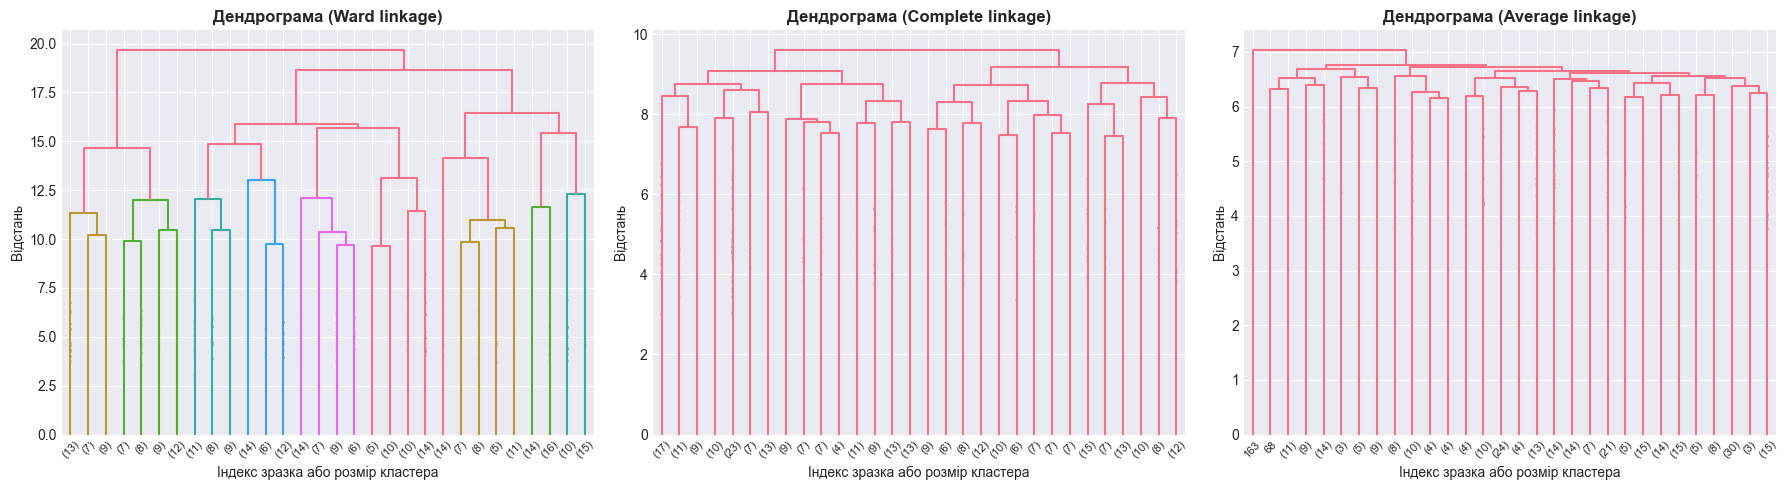


Порівняння ієрархічної кластеризації для різних K...

Результати Hierarchical для K=3:
  Silhouette Score: 0.007
  Davies-Bouldin Index: 7.493
  Calinski-Harabasz Score: 59.54
  Розподіл по кластерам: {np.int64(0): np.int64(1194), np.int64(1): np.int64(2224), np.int64(2): np.int64(1582)}

Результати Hierarchical для K=4:
  Silhouette Score: 0.001
  Davies-Bouldin Index: 6.642
  Calinski-Harabasz Score: 54.87
  Розподіл по кластерам: {np.int64(0): np.int64(2224), np.int64(1): np.int64(688), np.int64(2): np.int64(1582), np.int64(3): np.int64(506)}

Результати Hierarchical для K=5:
  Silhouette Score: -0.000
  Davies-Bouldin Index: 6.389
  Calinski-Harabasz Score: 51.87
  Розподіл по кластерам: {np.int64(0): np.int64(1582), np.int64(1): np.int64(697), np.int64(2): np.int64(1527), np.int64(3): np.int64(506), np.int64(4): np.int64(688)}


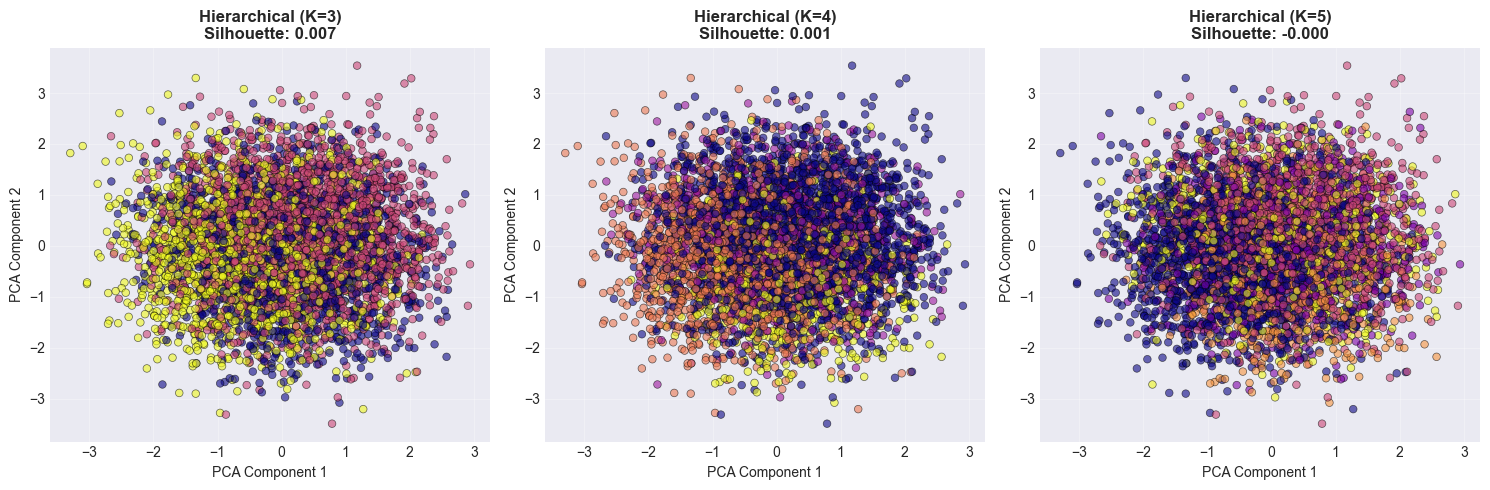


Таблиця метрик Hierarchical:
 K  Silhouette  Davies-Bouldin  Calinski-Harabasz
 3    0.007147        7.492547          59.537463
 4    0.000845        6.642036          54.870606
 5   -0.000149        6.389220          51.869438

ПОРІВНЯННЯ МЕТОДІВ

Оптимальне K для K-means: 4
Оптимальне K для Hierarchical: 3
Використовуємо K=4 для порівняння

Порівняльна таблиця метрик:
       Метод Silhouette Davies-Bouldin Calinski-Harabasz
     K-means      0.040          4.675            159.50
Hierarchical      0.001          6.642             54.87


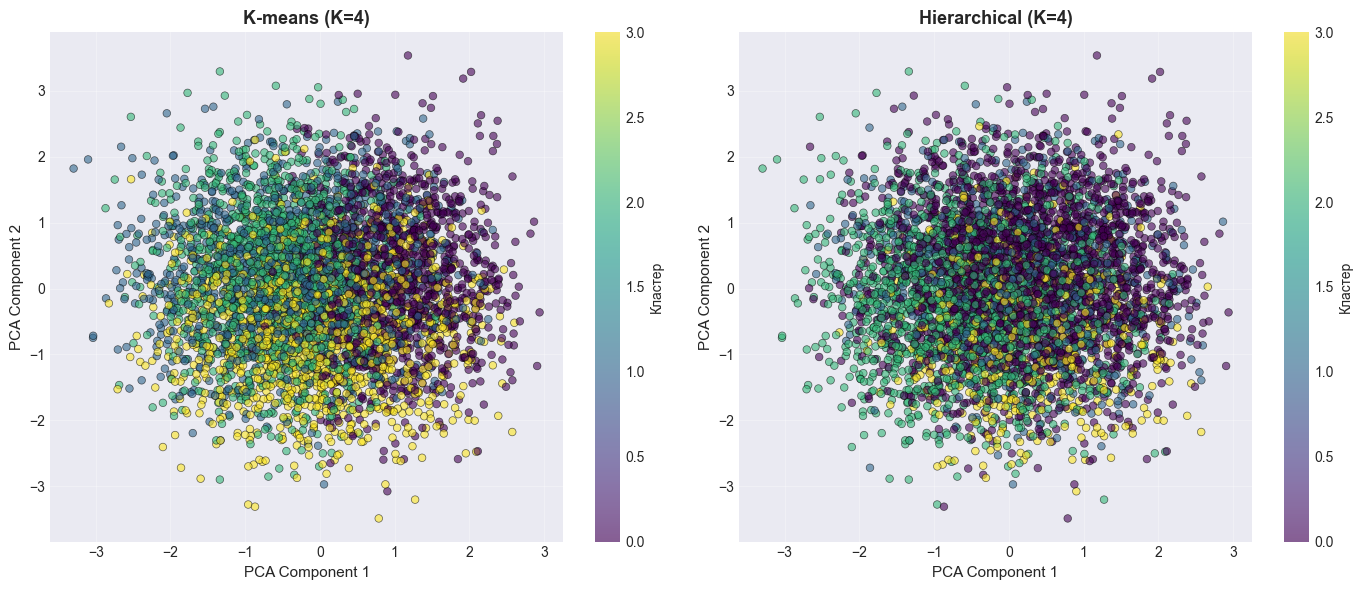


АНАЛІЗ ХАРАКТЕРИСТИК КЛАСТЕРІВ

Характеристики кластерів (K-means):
                Source Port  Destination Port  Packet Length  Anomaly Scores  \
Cluster_KMeans                                                                 
0                 33488.408         31225.238        800.556          52.421   
1                 33034.022         33817.203        792.375          49.179   
2                 31585.751         34624.296        782.336          46.821   
3                 33141.297         32752.899        796.197          51.216   

                Timestamp_hour  Timestamp_day  Timestamp_month  \
Cluster_KMeans                                                   
0                       12.616         15.484            9.107   
1                       11.409         15.553            6.310   
2                       10.874         15.710            4.035   
3                       11.256         15.652            6.364   

                Timestamp_dayofweek  Timestamp_year  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Налаштування для кращої візуалізації
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===================================================================
# ЗАВАНТАЖЕННЯ ТА ПІДГОТОВКА ДАНИХ
# ===================================================================

print("="*50)
print("ЗАВАНТАЖЕННЯ ДАТАСЕТУ")
print("="*50)

# Завантаження датасету
df = pd.read_csv('../DATASETS/L6/cybersecurity_attacks.csv')

print(f"\nРозмір датасету: {df.shape}")
print("\nПерші рядки:")
print(df.head())
print("\nТипи даних:")
print(df.dtypes)
print("\nІнформація про пропущені значення:")
print(df.isnull().sum())
print("\nОписова статистика:")
print(df.describe())

# ===================================================================
# ПОПЕРЕДНЯ ОБРОБКА ДАНИХ
# ===================================================================

print("\n" + "="*50)
print("ПОПЕРЕДНЯ ОБРОБКА ДАНИХ")
print("="*50)

# Створюємо копію для обробки
df_processed = df.copy()

# Спочатку вибираємо числові колонки
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
print(f"\nЗнайдено {len(numeric_cols)} числових колонок")

if len(numeric_cols) > 0:
    df_numeric = df_processed[numeric_cols].copy()
else:
    df_numeric = pd.DataFrame()

# Обробка категоріальних змінних (текстові колонки)
categorical_columns = df_processed.select_dtypes(include=['object']).columns
print(f"Знайдено {len(categorical_columns)} категоріальних колонок: {list(categorical_columns)}")

label_encoders = {}
for col in categorical_columns:
    # Спробуємо розпізнати дату
    try:
        date_series = pd.to_datetime(df_processed[col], errors='coerce')
        if date_series.notna().sum() > len(df_processed) * 0.5:  # Якщо більше 50% валідні дати
            print(f"Обробка дати: {col}")
            df_numeric[col + '_hour'] = date_series.dt.hour
            df_numeric[col + '_day'] = date_series.dt.day
            df_numeric[col + '_month'] = date_series.dt.month
            df_numeric[col + '_dayofweek'] = date_series.dt.dayofweek
            df_numeric[col + '_year'] = date_series.dt.year
            continue
    except:
        pass
    
    # Якщо не дата, то кодуємо як категорію
    if df_processed[col].nunique() < 100:  # Кодуємо тільки якщо не дуже багато унікальних значень
        try:
            le = LabelEncoder()
            # Заповнюємо пропущені значення перед кодуванням
            df_processed[col] = df_processed[col].fillna('Unknown')
            df_numeric[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le
            print(f"Закодовано: {col} ({len(le.classes_)} унікальних значень)")
        except Exception as e:
            print(f"Не вдалось закодувати {col}: {e}")
    else:
        print(f"Пропущено {col}: занадто багато унікальних значень ({df_processed[col].nunique()})")

# Обробка пропущених значень - заповнюємо медіаною
print(f"\nПропущені значення перед обробкою:")
print(df_numeric.isnull().sum()[df_numeric.isnull().sum() > 0])

df_numeric = df_numeric.fillna(df_numeric.median())

# Перевірка на нескінченні значення
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)
df_numeric = df_numeric.fillna(df_numeric.median())

print(f"\nФінальний розмір після обробки: {df_numeric.shape}")
print(f"Числові ознаки ({len(df_numeric.columns)}): {list(df_numeric.columns)}")

# Перевірка чи є дані
if len(df_numeric) == 0:
    raise ValueError("Після обробки не залишилось даних! Перевірте вхідний датасет.")

if df_numeric.shape[1] < 2:
    raise ValueError("Недостатньо ознак для кластеризації! Потрібно мінімум 2 числові колонки.")

# Видалення колонок з нульовою дисперсією
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
df_numeric_filtered = pd.DataFrame(
    selector.fit_transform(df_numeric),
    columns=df_numeric.columns[selector.get_support()],
    index=df_numeric.index
)

if len(df_numeric_filtered.columns) < len(df_numeric.columns):
    print(f"\nВидалено {len(df_numeric.columns) - len(df_numeric_filtered.columns)} колонок з нульовою дисперсією")
    df_numeric = df_numeric_filtered

# Обмеження кількості зразків для швидкості (якщо датасет дуже великий)
if len(df_numeric) > 5000:
    print(f"\nДатасет великий ({len(df_numeric)} рядків), беремо вибірку 5000 зразків")
    df_numeric = df_numeric.sample(n=5000, random_state=42)

# ===================================================================
# ПІДГОТОВКА ДАНИХ ДЛЯ КЛАСТЕРИЗАЦІЇ
# ===================================================================

print("\n" + "="*50)
print("ПІДГОТОВКА ДАНИХ ДЛЯ КЛАСТЕРИЗАЦІЇ")
print("="*50)

# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print(f"Форма нормалізованих даних: {X_scaled.shape}")

# Зменшення розмірності для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Пояснена дисперсія PCA: {pca.explained_variance_ratio_}")
print(f"Загальна пояснена дисперсія: {sum(pca.explained_variance_ratio_):.2%}")

# ===================================================================
# МЕТОД K-СЕРЕДНІХ
# ===================================================================

print("\n" + "="*50)
print("МЕТОД K-СЕРЕДНІХ")
print("="*50)

# Визначення оптимальної кількості кластерів
inertias = []
silhouette_scores = []
k_range = range(2, 11)

print("\nВизначення оптимальної кількості кластерів...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# Візуалізація методу ліктя
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Кількість кластерів (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Метод ліктя', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Кількість кластерів (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дослідження різних значень K
optimal_k_values = [3, 4, 5]
fig, axes = plt.subplots(1, len(optimal_k_values), figsize=(15, 5))

kmeans_results = []
for idx, k in enumerate(optimal_k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X_scaled)
    
    # Метрики якості
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    
    kmeans_results.append({
        'K': k,
        'Silhouette': sil_score,
        'Davies-Bouldin': db_score,
        'Calinski-Harabasz': ch_score
    })
    
    print(f"\nРезультати K-means для K={k}:")
    print(f"  Silhouette Score: {sil_score:.3f} (краще ближче до 1)")
    print(f"  Davies-Bouldin Index: {db_score:.3f} (краще менше)")
    print(f"  Calinski-Harabasz Score: {ch_score:.2f} (краще більше)")
    
    # Підрахунок елементів у кластерах
    unique, counts = np.unique(labels, return_counts=True)
    print(f"  Розподіл по кластерам: {dict(zip(unique, counts))}")
    
    # Візуалізація
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                                cmap='viridis', s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    # Центри кластерів
    centers_pca = pca.transform(kmeans.cluster_centers_)
    axes[idx].scatter(centers_pca[:, 0], centers_pca[:, 1], 
                      marker='X', s=300, c='red', edgecolors='black', linewidths=2,
                      label='Центри')
    
    axes[idx].set_xlabel('PCA Component 1', fontsize=10)
    axes[idx].set_ylabel('PCA Component 2', fontsize=10)
    axes[idx].set_title(f'K-means (K={k})\nSilhouette: {sil_score:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Таблиця результатів K-means
kmeans_df = pd.DataFrame(kmeans_results)
print("\nТаблиця метрик K-means:")
print(kmeans_df.to_string(index=False))

# ===================================================================
# ІЄРАРХІЧНА КЛАСТЕРИЗАЦІЯ
# ===================================================================

print("\n" + "="*50)
print("ІЄРАРХІЧНА КЛАСТЕРИЗАЦІЯ")
print("="*50)

# Обмеження для дендрограми (якщо датасет дуже великий)
sample_size_dendro = min(300, len(X_scaled))
X_sample = X_scaled[:sample_size_dendro]

print(f"\nДля дендрограми використовуємо {sample_size_dendro} зразків")

# Побудова дендрограм з різними методами зв'язку
linkage_methods = ['ward', 'complete', 'average']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, method in enumerate(linkage_methods):
    print(f"Обчислення linkage методом {method}...")
    Z = linkage(X_sample, method=method)
    
    axes[idx].set_title(f'Дендрограма ({method.capitalize()} linkage)', 
                        fontsize=12, fontweight='bold')
    dendrogram(Z, ax=axes[idx], truncate_mode='lastp', p=30, 
               leaf_font_size=8, show_contracted=True)
    axes[idx].set_xlabel('Індекс зразка або розмір кластера', fontsize=10)
    axes[idx].set_ylabel('Відстань', fontsize=10)

plt.tight_layout()
plt.show()

# Порівняння різних кількостей кластерів
print("\nПорівняння ієрархічної кластеризації для різних K...")
fig, axes = plt.subplots(1, len(optimal_k_values), figsize=(15, 5))

hierarchical_results = []
for idx, k in enumerate(optimal_k_values):
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X_scaled)
    
    # Метрики якості
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    
    hierarchical_results.append({
        'K': k,
        'Silhouette': sil_score,
        'Davies-Bouldin': db_score,
        'Calinski-Harabasz': ch_score
    })
    
    print(f"\nРезультати Hierarchical для K={k}:")
    print(f"  Silhouette Score: {sil_score:.3f}")
    print(f"  Davies-Bouldin Index: {db_score:.3f}")
    print(f"  Calinski-Harabasz Score: {ch_score:.2f}")
    
    # Підрахунок елементів у кластерах
    unique, counts = np.unique(labels, return_counts=True)
    print(f"  Розподіл по кластерам: {dict(zip(unique, counts))}")
    
    # Візуалізація
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                                cmap='plasma', s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    axes[idx].set_xlabel('PCA Component 1', fontsize=10)
    axes[idx].set_ylabel('PCA Component 2', fontsize=10)
    axes[idx].set_title(f'Hierarchical (K={k})\nSilhouette: {sil_score:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Таблиця результатів Hierarchical
hierarchical_df = pd.DataFrame(hierarchical_results)
print("\nТаблиця метрик Hierarchical:")
print(hierarchical_df.to_string(index=False))

# ===================================================================
# ПОРІВНЯННЯ МЕТОДІВ
# ===================================================================

print("\n" + "="*50)
print("ПОРІВНЯННЯ МЕТОДІВ")
print("="*50)

# Вибір оптимального K на основі Silhouette Score
best_k_kmeans = kmeans_df.loc[kmeans_df['Silhouette'].idxmax(), 'K']
best_k_hierarchical = hierarchical_df.loc[hierarchical_df['Silhouette'].idxmax(), 'K']
best_k = int(best_k_kmeans)

print(f"\nОптимальне K для K-means: {int(best_k_kmeans)}")
print(f"Оптимальне K для Hierarchical: {int(best_k_hierarchical)}")
print(f"Використовуємо K={best_k} для порівняння")

# K-means
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# Hierarchical
hierarchical_final = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
hierarchical_labels = hierarchical_final.fit_predict(X_scaled)

# Порівняння метрик
methods = ['K-means', 'Hierarchical']
labels_list = [kmeans_labels, hierarchical_labels]

comparison_results = []
for method, labels in zip(methods, labels_list):
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    comparison_results.append({
        'Метод': method,
        'Silhouette': f'{sil:.3f}',
        'Davies-Bouldin': f'{db:.3f}',
        'Calinski-Harabasz': f'{ch:.2f}'
    })

comparison_df = pd.DataFrame(comparison_results)
print("\nПорівняльна таблиця метрик:")
print(comparison_df.to_string(index=False))

# Візуальне порівняння
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (method, labels) in enumerate(zip(methods, labels_list)):
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                                cmap='viridis', s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[idx].set_xlabel('PCA Component 1', fontsize=11)
    axes[idx].set_ylabel('PCA Component 2', fontsize=11)
    axes[idx].set_title(f'{method} (K={best_k})', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Кластер')

plt.tight_layout()
plt.show()

# ===================================================================
# АНАЛІЗ КЛАСТЕРІВ
# ===================================================================

print("\n" + "="*50)
print("АНАЛІЗ ХАРАКТЕРИСТИК КЛАСТЕРІВ")
print("="*50)

# Аналіз для K-means
df_with_clusters = df_numeric.copy()
df_with_clusters['Cluster_KMeans'] = kmeans_labels

print("\nХарактеристики кластерів (K-means):")
cluster_stats = df_with_clusters.groupby('Cluster_KMeans').mean()
print(cluster_stats.round(3))

# Збереження результатів у CSV
df_with_clusters.to_csv('clustered_data.csv', index=False)
cluster_stats.to_csv('cluster_statistics.csv')

# ===================================================================
# ВИСНОВКИ
# ===================================================================

print("\n" + "="*50)
print("ВИСНОВКИ")
print("="*50)

print(f"""
1. Оброблено датасет розміром {df_numeric.shape[0]} записів з {df_numeric.shape[1]} ознаками
2. Оптимальна кількість кластерів визначена на основі метрик якості
3. K-means показав Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}
4. Hierarchical показав Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.3f}

- Silhouette Score: від -1 до 1 (краще ближче до 1)
- Davies-Bouldin Index: мінімізується (краще менше)
- Calinski-Harabasz Score: максимізується (краще більше)

""")